### Objective : Convolutional Neural Network
### Agenda
1. History of CNN
2. Limitations of DNN
3. Convolutional Layer
4. Pooling Layer
5. CNN Architectures
6. Implementing RestNet-34 
7. Using Pretrained Model
8. Classification & Localization
9. Object Detection
10. Sematic Regmentation

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline

### 3. Convolutional Layer

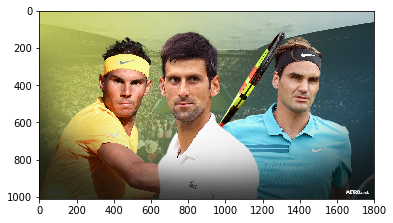

In [3]:
img = imread('img/tennis.jpg')
plt.imshow(img)

In [4]:
img = img.reshape(1, 1011,1800,3)
img = tf.cast(img, tf.float32)

In [71]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, 3, 1), dtype=np.float32)
filters[3:4, 3, :, 0] = 1  # the dot

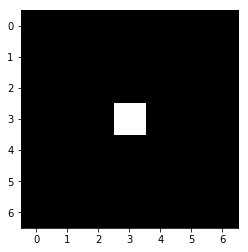

In [73]:
plt.imshow(filters[:,:,:,0])

In [74]:
outputs = tf.nn.conv2d(img, filters, strides=1, padding="SAME")

In [75]:
outputs.shape

TensorShape([1, 1011, 1800, 1])

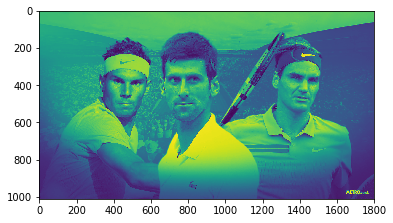

In [81]:
res = plt.imshow(outputs[0, :, :, 0])
plt.savefig('play.jpg')

* The maths behind it

<img src="img/cnn.png">

### 4. Pooling Layer
* Their goal is to subsample  the input image in order to reduce the computational load.
* Reduce the memory usage.
* Reduce the number of parameters (thereby limiting the risk of overfitting).
* Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field.
* You must define its size, the stride, and the padding type, just like before. However, a pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.

<img src="img/pooling.png">

* Types of Pooling - MaxPooling, AveragePooling, GlobalAveragePooling.
* MaxPooling is more popular because - perfroms better, prominent information trained, less compute

In [106]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [109]:
output = max_pool(img)

In [111]:
img.shape

TensorShape([1, 1011, 1800, 3])

In [110]:
output.shape

TensorShape([1, 505, 900, 3])

In [26]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
output = global_avg_pool(img)
output.shape

TensorShape([1, 3])

### 5. CNN Architectures
#### Thumb Rules to make a good call
* Initially have lesser number of filters since basic features will be less
* As, we go deeper into layers, number of complex features will increase. So, keep doubling features. 

In [83]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [84]:
train_images.shape

(60000, 28, 28, 1)

In [100]:
def make_model():
    model = keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.GlobalAvgPool2D())
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [101]:
model = make_model()

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)               

In [105]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0537 - val_accuracy: 0.9842
Epoch 2/5
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0300 - val_accuracy: 0.9908
Epoch 3/5
60000/60000 [==============================] - 21s 347us/sample - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 4/5
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0230 - val_accuracy: 0.9932
Epoch 5/5
60000/60000 [==============================] - 21s 356us/sample - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0312 - val_accuracy: 0.9910


### Create more CNN Architectures
* We will use Fashion MNIST with basic preprocessing.

* The first layer uses 64 fairly large filters (7 × 7) but no stride because the input images are not very large. It also sets input_shape=[28, 28, 1], because the images are 28 × 28 pixels, with a single color channel (i.e., grayscale).

* Next, we have a max pooling layer, which uses a pool size of 2, so it divides each spatial dimension by a factor of 2.

* Then we repeat the same structure twice: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter you can tune).

* Note that the number of filters grows as we climb up the CNN toward the output layer (it is initially 64, then 128, then 256): it makes sense for it to grow, since the number of low-level features is often fairly low (e.g., small circles, horizontal lines), but there are many different ways to combine them into higher-level features. It is a common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by a factor of 2, we can afford doubling the number of feature maps in the next layer, without fear of exploding the number of parameters, memory usage, or computational load.

* Next is the fully connected network, composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs, since a dense network expects a 1D array of features for each instance. We also add two dropout layers, with a dropout rate of 50% each, to reduce overfitting.

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same",),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same",),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same",),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same",),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

* A cleaner way of writing code

In [19]:
from functools import partial

BaseConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    BaseConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    BaseConv2D(filters=128),
    BaseConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    BaseConv2D(filters=256),
    BaseConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)        

### 6. Create Custom Layers

In [22]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)

In [23]:
deep_pool_class_layer = DepthMaxPool(3)

In [24]:
deep_pool_lambda = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))

In [25]:
img.shape

TensorShape([1, 1011, 1800, 3])

In [28]:
deep_pool_class_layer(img).shape

TensorShape([1, 1011, 1800, 1])

In [29]:
deep_pool_lambda(img).shape

TensorShape([1, 1011, 1800, 1])

### Implement ResNet-34
* Deep Network gives good result
* Handles vanishing gradient
* Input information is added to output of layer before applying activation function

In [30]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [31]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

### Using Pre-trained Model

In [34]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 341s 3us/step


In [36]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [68]:
image = imread('img/cat-orig.JPG')

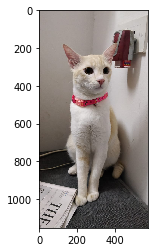

In [69]:
plt.imshow(image)

In [61]:
image = image.reshape(1,*image.shape)

In [62]:
images_resized = tf.image.resize(image, [224, 224])

In [63]:
res = model.predict(images_resized)

In [64]:
np.argmax(res)

265

In [65]:
res.shape

(1, 1000)

In [66]:
keras.applications.resnet50.decode_predictions(res, top=3)

[[('n02113624', 'toy_poodle', 0.38422552),
  ('n02123597', 'Siamese_cat', 0.13523287),
  ('n06785654', 'crossword_puzzle', 0.043460734)]]

In [77]:
#After some image croping
image = imread('img/cat.jpg')

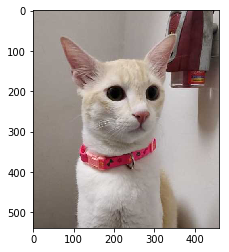

In [76]:
plt.imshow(image[0])

In [71]:
image = image.reshape(1,*image.shape)

In [72]:
images_resized = tf.image.resize(image, [224, 224])

In [73]:
res = model.predict(images_resized)
np.argmax(res)

284

In [74]:
keras.applications.resnet50.decode_predictions(res, top=3)

[[('n02123597', 'Siamese_cat', 0.64793986),
  ('n02127052', 'lynx', 0.063066274),
  ('n02124075', 'Egyptian_cat', 0.047400966)]]

### Pretrained Model for Transfer Learning

In [2]:
import tensorflow_datasets as tfds

In [3]:
dataset, info = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

W0801 17:39:17.482125 139715128334144 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [4]:
class_names = info.features["label"].names
class_names

['cat', 'dog']

In [5]:
dataset_size = info.splits["train"].num_examples
dataset_size

23262

In [6]:
test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])

test_set_raw = tfds.load("cats_vs_dogs", split=test_split, as_supervised=True)
valid_set_raw = tfds.load("cats_vs_dogs", split=valid_split, as_supervised=True)
train_set_raw = tfds.load("cats_vs_dogs", split=train_split, as_supervised=True)

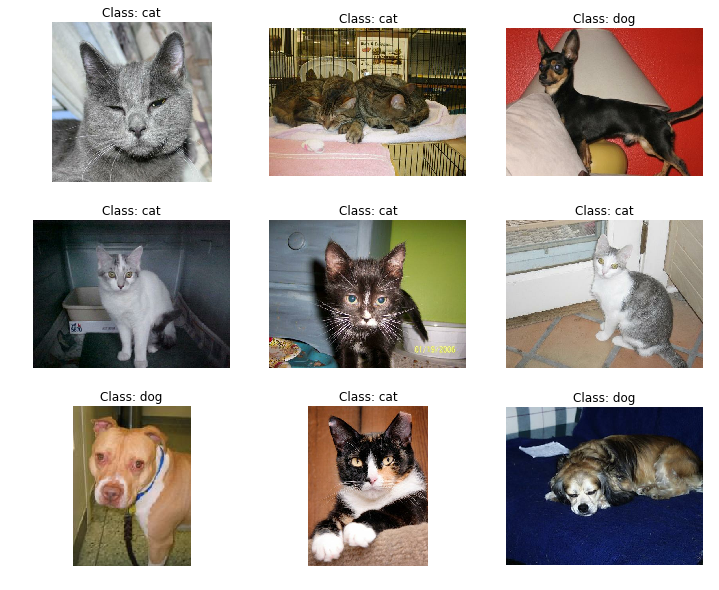

In [7]:

plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [12]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_img(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [14]:
train = train_set_raw.map(format_img)
validation = valid_set_raw.map(format_img)
test = test_set_raw.map(format_img)

In [16]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [89]:
base_model = keras.applications.ResNet50(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(2, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [17]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 27s 3us/step


In [19]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [20]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [21]:
base_model.trainable = False

In [22]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [23]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [24]:
prediction_layer = keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [25]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
len(model.trainable_variables)

2

In [29]:
initial_epochs = 10
#steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10


W0801 17:59:03.634399 139715128334144 deprecation.py:323] From /home/awantik/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


545/545 [==============================] - 352s 645ms/step - loss: 2.0148 - accuracy: 0.7391 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
545/545 [==============================] - 343s 629ms/step - loss: 1.1057 - accuracy: 0.8524 - val_loss: 0.8054 - val_accuracy: 0.8996
Epoch 3/10
545/545 [==============================] - 329s 604ms/step - loss: 0.8542 - accuracy: 0.8843 - val_loss: 0.6723 - val_accuracy: 0.9156
Epoch 4/10
545/545 [==============================] - 332s 609ms/step - loss: 0.7010 - accuracy: 0.9046 - val_loss: 0.5813 - val_accuracy: 0.9296
Epoch 5/10
545/545 [==============================] - 332s 608ms/step - loss: 0.6078 - accuracy: 0.9163 - val_loss: 0.7210 - val_accuracy: 0.9199
Epoch 6/10
545/545 [==============================] - 334s 613ms/step - loss: 0.5537 - accuracy: 0.9237 - val_loss: 0.5077 - val_accuracy: 0.9422
Epoch 7/10
545/545 [==============================] - 332s 609ms/step - loss: 0.5029 - accuracy: 0.9299 - val_loss: 0.5550 - va

In [32]:
model.save('models/Mod3/cat-dog-base-model.h5')

In [34]:
len(base_model.layers)

155

In [35]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  155


In [36]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [38]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch = initial_epochs,
                         validation_data=validation_batches, callbacks=[early_stop])

Epoch 11/20
545/545 [==============================] - 584s 1s/step - loss: 0.3810 - accuracy: 0.9523 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 12/20
545/545 [==============================] - 519s 952ms/step - loss: 0.2941 - accuracy: 0.9757 - val_loss: 0.2050 - val_accuracy: 0.9745
Epoch 13/20
545/545 [==============================] - 543s 996ms/step - loss: 0.2654 - accuracy: 0.9813 - val_loss: 0.2156 - val_accuracy: 0.9751
Epoch 14/20
545/545 [==============================] - 525s 962ms/step - loss: 0.2396 - accuracy: 0.9834 - val_loss: 0.1952 - val_accuracy: 0.9760
Epoch 15/20
545/545 [==============================] - 526s 966ms/step - loss: 0.2259 - accuracy: 0.9847 - val_loss: 0.1972 - val_accuracy: 0.9737
Epoch 16/20
545/545 [==============================] - 519s 952ms/step - loss: 0.2169 - accuracy: 0.9855 - val_loss: 0.1953 - val_accuracy: 0.9734
Epoch 17/20
545/545 [==============================] - 755s 1s/step - loss: 0.2118 - accuracy: 0.9860 - val_loss:

KeyboardInterrupt: 

### Transfer Learning with tfHub

### Object Detection
* The task of classifying and localizing multiple objects in an image is called object detection.
* A common approach was to take a CNN that was trained to classify and locate a single object, then slide it across the image.
* Techniques - Faster CNN, YoLo